# EDA on CIFAR-100 dataset

Load dataset from huggingface

In [1]:
from datasets import load_dataset_builder, load_dataset

In [2]:
ds_builder = load_dataset_builder("cifar100")
ds_builder.info

DatasetInfo(description='The CIFAR-100 dataset consists of 60000 32x32 colour images in 100 classes, with 600 images\nper class. There are 500 training images and 100 testing images per class. There are 50000 training images and 10000 test images. The 100 classes are grouped into 20 superclasses.\nThere are two labels per image - fine label (actual class) and coarse label (superclass).\n', citation='@TECHREPORT{Krizhevsky09learningmultiple,\n    author = {Alex Krizhevsky},\n    title = {Learning multiple layers of features from tiny images},\n    institution = {},\n    year = {2009}\n}\n', homepage='https://www.cs.toronto.edu/~kriz/cifar.html', license='', features={'img': Image(decode=True, id=None), 'fine_label': ClassLabel(names=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', '

In [3]:
features = ds_builder.info.features

In [4]:
ds = load_dataset("cifar100")
ds

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [5]:
ds.set_format("torch")

Visualizing Examples

In [6]:
import matplotlib.pyplot as plt

('apple', 'fruit_and_vegetables')

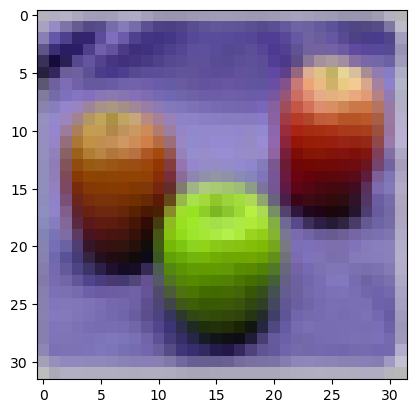

In [7]:
example = ds["test"][9]
plt.imshow(example["img"]),
(
    features["fine_label"].names[example["fine_label"].item()],
    features["coarse_label"].names[example["coarse_label"].item()],
)

Class Distribution

In [9]:
import numpy as np

In [10]:
fine_labels = []
coarse_labels = []

for i in ds["train"]:
    fine_labels.append(i["fine_label"].item())
    coarse_labels.append(i["coarse_label"].item())

fine_labels = np.array(fine_labels)
coarse_labels = np.array(coarse_labels)
fine_labels, coarse_labels
fine_labels, coarse_labels

(array([19, 29,  0, ...,  3,  7, 73]), array([11, 15,  4, ...,  8,  7,  1]))

In [11]:
np.unique(fine_labels, return_counts=True), np.unique(coarse_labels, return_counts=True)

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
         500, 500, 500, 50

In [12]:
fine_labels = []
coarse_labels = []

for i in ds["test"]:
    fine_labels.append(i["fine_label"].item())
    coarse_labels.append(i["coarse_label"].item())

fine_labels = np.array(fine_labels)
coarse_labels = np.array(coarse_labels)
fine_labels, coarse_labels

(array([49, 33, 72, ..., 51, 42, 70]), array([10, 10,  0, ...,  4,  8,  2]))

In [13]:
np.unique(fine_labels, return_counts=True), np.unique(coarse_labels, return_counts=True)

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
         100, 100, 100, 10

Image Statistics

In [14]:
mean = np.zeros(3)
std = np.zeros(3)

for i in ds["train"]:
    mean += i["img"].numpy().mean(axis=(0, 1))
    std += i["img"].numpy().std(axis=(0, 1))

for i in ds["test"]:
    mean += i["img"].numpy().mean(axis=(0, 1))
    std += i["img"].numpy().std(axis=(0, 1))

mean /= 60000
std /= 60000

mean, std

(array([129.37731888, 124.10583864, 112.47758569]),
 array([51.24804743, 50.64248745, 51.61805643]))

Preprocessing the images

In [15]:
from torchvision import transforms

In [18]:
# Normalize
img_tfms = transforms.Compose(
    [
        transforms.Normalize(
            (129.37731888, 124.10583864, 112.47758569),
            (51.24804743, 50.64248745, 51.61805643),
        )
    ]
)
img_tfms

Compose(
    Normalize(mean=(129.37731888, 124.10583864, 112.47758569), std=(51.24804743, 50.64248745, 51.61805643))
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


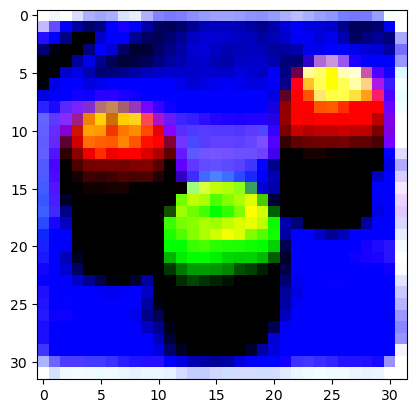

In [27]:
example = ds["test"][9]
plt.imshow(img_tfms(example["img"].permute(2, 1, 0).float()).permute(2, 1, 0))

Image Augmentation

In [28]:
import albumentations as A

In [40]:
aug = A.Compose([A.RandomRotate90()])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


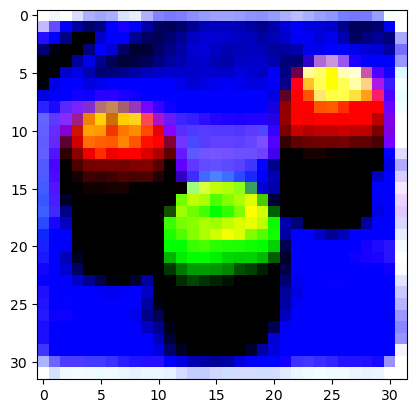

In [48]:
example = ds["test"][9]
example = img_tfms(example["img"].permute(2, 1, 0).float()).permute(2, 1, 0)
plt.imshow(aug(image=example.numpy())["image"])